# Workshop 3: Wrangling, exploration & cleaning

Interesting sources: 
- https://learn.datacamp.com/courses/introduction-to-data-science-in-python
- https://learn.datacamp.com/courses/data-manipulation-with-pandas

![](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/media/overview/tdsp-lifecycle2.png "Data Science Lifecycle")

## Why exploration?

### Data understanding & quality
* What does the data mean?
* Do I understand the context of the data?
* Does the data make sense?
* Are there any quality issues?
* Do I have enough data for my model?
* Is the data ready to be used by my model?

### Data visualization
* Helps you understand the data
* Helps you let others (colleges, manager, customer, etc.) understand the data and the story you want to tell them.

## Tools

### Data exploration & wrangling

* Pandas

### Exploration by visualizing
* Matplotlib: Forms the base. Very flexible. Many knots to turns. Not always the best, quickest out-of-the-box visualization 
* Pandas: Uses matplotlib. Helps to easier plot data from pandas dataframes.
* Seaborn: Wrapped around matplotlib to make the plots more visually appealing and also makes some complicated plots easier to create. 

## Reading data

In this scenario we received a csv file, extracted from a relational database, from an energy company like Essent, Nuon, Eneco, E. ON, Engie, etc.
This is a common scenario when working for a client, because it's unlikely that they will provide you with direct access to their database. This CSV file is the result of a large SQL-query with multiple JOINs and GROUP BY's on multiple tables.

During the course of this notebook, we will be asking the same questions that you will be asking and answering in almost any data science scenario. 

In [1]:
import pandas as pd

In [2]:
pd.read_csv?

In [3]:
df = pd.read_csv('data/EnergyCorp.csv', sep=';')

What does a row mean in this dataset?

In [4]:
df.head()

,klantnr,huidig_contractduur,VERBRUIKGAS,VERBRUIKEL,VERBRUIKHOOG,VERBRUIKLAAG,nieuwsbrief,wervingskanaal,vast_variabel,grijs_groen,startlevering,eindlevering,contract_verlengd,welstand,levensfase,bouwjaar,soort_woning,inkomen,opleiding
0,10135,12,0,3047,0,0,Y,Online,vaste prijs,grijze stroom,11-10-2002,3-11-2004,niet verlengd,Laag,Alleenstaand,1940 tot 1969,Hoge flat,tussen modaal en 2 keer modaal keer modaal of ...,Midden
1,10150,12,0,0,3247,3257,Y,Online,vaste prijs,grijze stroom,11-10-2002,11-10-2005,niet verlengd,Hoog,Paar met kinderen,1970 tot 1989,Rijtjeshuis,modaal,Hoog
2,10159,12,0,2426,0,0,N,Online,vaste prijs,grijze stroom,11-10-2002,5-1-2007,niet verlengd,Midden,Paar met kinderen,Voor 1899,Rijtjeshuis,tussen modaal en 2 keer modaal,Hoog
3,10193,36,1616,2092,0,0,Y,Inbound,variabele prijs,groene stroom,17-10-2002,26-3-2012,niet verlengd,Laag,Paar met kinderen,Voor 1899,Lage flat,modaal,Laag
4,10206,12,0,2787,0,0,Y,Online,vaste prijs,groene stroom,11-10-2002,5-2-2009,niet verlengd,Hoog,Paar met kinderen,Voor 1899,Rijtjeshuis,modaal,Midden


How many customers (= rows) do we have data about?

In [5]:
len(df)

9939

What type of information have we received about these customers?

In [6]:
df.columns

Index(['klantnr', 'huidig_contractduur', 'VERBRUIKGAS', 'VERBRUIKEL',
       'VERBRUIKHOOG', 'VERBRUIKLAAG', 'nieuwsbrief', 'wervingskanaal',
       'vast_variabel', 'grijs_groen', 'startlevering', 'eindlevering',
       'contract_verlengd', 'welstand', 'levensfase', 'bouwjaar',
       'soort_woning', 'inkomen', 'opleiding'],
      dtype='object')

Pandas: Filtering specific columns

In [7]:
df['klantnr']

0        10135
1        10150
2        10159
3        10193
4        10206
         ...  
9934    760912
9935    764164
9936    764460
9937    765254
9938    766333
Name: klantnr, Length: 9939, dtype: int64

In [8]:
df[['klantnr', 'nieuwsbrief']]

,klantnr,nieuwsbrief
0,10135,Y
1,10150,Y
2,10159,N
3,10193,Y
4,10206,Y
...,...,...
9934,760912,Y
9935,764164,N
9936,764460,N
9937,765254,N


Filtering specific rows

In [9]:
df.iloc[0:4]

,klantnr,huidig_contractduur,VERBRUIKGAS,VERBRUIKEL,VERBRUIKHOOG,VERBRUIKLAAG,nieuwsbrief,wervingskanaal,vast_variabel,grijs_groen,startlevering,eindlevering,contract_verlengd,welstand,levensfase,bouwjaar,soort_woning,inkomen,opleiding
0,10135,12,0,3047,0,0,Y,Online,vaste prijs,grijze stroom,11-10-2002,3-11-2004,niet verlengd,Laag,Alleenstaand,1940 tot 1969,Hoge flat,tussen modaal en 2 keer modaal keer modaal of ...,Midden
1,10150,12,0,0,3247,3257,Y,Online,vaste prijs,grijze stroom,11-10-2002,11-10-2005,niet verlengd,Hoog,Paar met kinderen,1970 tot 1989,Rijtjeshuis,modaal,Hoog
2,10159,12,0,2426,0,0,N,Online,vaste prijs,grijze stroom,11-10-2002,5-1-2007,niet verlengd,Midden,Paar met kinderen,Voor 1899,Rijtjeshuis,tussen modaal en 2 keer modaal,Hoog
3,10193,36,1616,2092,0,0,Y,Inbound,variabele prijs,groene stroom,17-10-2002,26-3-2012,niet verlengd,Laag,Paar met kinderen,Voor 1899,Lage flat,modaal,Laag


Filtering rows and columns at the same time

In [10]:
df.loc[0:4, ['klantnr', 'nieuwsbrief']]

,klantnr,nieuwsbrief
0,10135,Y
1,10150,Y
2,10159,N
3,10193,Y
4,10206,Y


Filtering rows based on a condition

In [11]:
klanten_met_nieuwsbrief = df[df['nieuwsbrief'] == 'Y']
klanten_met_nieuwsbrief.head()

,klantnr,huidig_contractduur,VERBRUIKGAS,VERBRUIKEL,VERBRUIKHOOG,VERBRUIKLAAG,nieuwsbrief,wervingskanaal,vast_variabel,grijs_groen,startlevering,eindlevering,contract_verlengd,welstand,levensfase,bouwjaar,soort_woning,inkomen,opleiding
0,10135,12,0,3047,0,0,Y,Online,vaste prijs,grijze stroom,11-10-2002,3-11-2004,niet verlengd,Laag,Alleenstaand,1940 tot 1969,Hoge flat,tussen modaal en 2 keer modaal keer modaal of ...,Midden
1,10150,12,0,0,3247,3257,Y,Online,vaste prijs,grijze stroom,11-10-2002,11-10-2005,niet verlengd,Hoog,Paar met kinderen,1970 tot 1989,Rijtjeshuis,modaal,Hoog
3,10193,36,1616,2092,0,0,Y,Inbound,variabele prijs,groene stroom,17-10-2002,26-3-2012,niet verlengd,Laag,Paar met kinderen,Voor 1899,Lage flat,modaal,Laag
4,10206,12,0,2787,0,0,Y,Online,vaste prijs,groene stroom,11-10-2002,5-2-2009,niet verlengd,Hoog,Paar met kinderen,Voor 1899,Rijtjeshuis,modaal,Midden
5,10209,36,2167,0,2549,2106,Y,Speciale sales acties,variabele prijs,grijze stroom,11-10-2002,16-8-2012,niet verlengd,Hoog,Paar met kinderen,Voor 1899,Rijtjeshuis,Onbekend,Midden


When looking at data, you will typically notice two big distinct types of data:
* **Categorical**: Has a distinct number of possible values. Also known as **qualitative data**. Example columns: nieuwsbrief, wervingskanaal, grijs_groen, ...
* **Numerical**: Data for which operations like addition, substraction, multiplication and divsions make sense. Also known as **quantitative data**. Examples of columns: VERBRUIKGAS, VERBUIKEL, ...

This distinction is important because this type defines what kind of exploration we can do on that column.

### Exercise: What kind of data is...
- welstand?
- VERBRUIKHOOG?
- klantnr?

## Unvariate analysis

In univariate analysis we look at each column separately. In this notebook, I will mostly be talking about 'columns'. This is the term that we're used to from SQL and relationele databases. However, you will encounter other terms depending on the domain or perspective.

- SQL: Columns
- Statistics: Variables
- Machine Learning: Features

Important questions related to univeriate analysis:
* What kind of values does this column have?
* How are the values of this column distributed?
* Do all rows have a value for this column?
* Do the values in this column make sense? 

Let's start with a categorical variable: wervingskanaal

In [12]:
df['wervingskanaal']

0                 Online
1                 Online
2                 Online
3                Inbound
4                 Online
              ...       
9934       Telemarketing
9935    Prijsvergelijker
9936    Prijsvergelijker
9937              Online
9938             Inbound
Name: wervingskanaal, Length: 9939, dtype: object

What kind of values does this column have?

In [13]:
df['wervingskanaal'].unique()

array(['Online', 'Inbound', 'Speciale sales acties', 'Telemarketing',
       'Prijsvergelijker', 'Door 2 Door'], dtype=object)

### Exercise
Do we understand what these values mean? 
If not, where can you obtain this information if this was data for your group project?

How are the values of this column distributed?

In [14]:
df['wervingskanaal'].value_counts()

Telemarketing            4207
Online                   1969
Prijsvergelijker         1295
Door 2 Door              1061
Speciale sales acties     735
Inbound                   672
Name: wervingskanaal, dtype: int64

We know the information for the distribution, but good visualizations are easier to understand, read and interpret than text.
The distribution of categorical data can for example be visualized with a **bar plot**. 

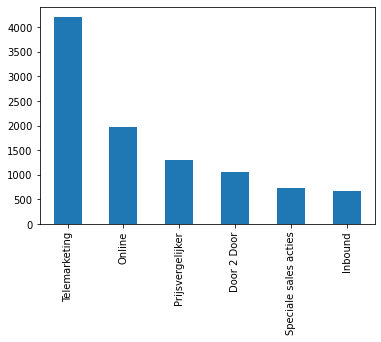

In [15]:
df['wervingskanaal'].value_counts().plot(kind='bar')

Now let's look at a numerical variable: VERBRUIKGAS

In [16]:
df['VERBRUIKGAS']

0          0
1          0
2          0
3       1616
4          0
        ... 
9934    3602
9935    1703
9936    1023
9937    3691
9938    3357
Name: VERBRUIKGAS, Length: 9939, dtype: int64

Numerical variables tend to have a large range of values, so it doesn't make sense to look at unique values like we did for categorical variables.
Important questions to ask:
- What's the lowest and highest value that we see in the data? = What's the lowest and highest gas consumption that we see in the data? This provides us with insights in the range of the data.
- What's mean or median value? = What's the average gas consumption? This provides us with insight about what typical values we could expect. 

We could ask for each of these statistics separately...

In [17]:
print(df['VERBRUIKGAS'].min())
print(df['VERBRUIKGAS'].max())

0
386338


... but Pandas has a nice function for providing all these statistics at once

In [18]:
df['VERBRUIKGAS'].describe()

count      9939.000000
mean       2180.022739
std        7998.935912
min           0.000000
25%         954.000000
50%        1597.000000
75%        2296.500000
max      386338.000000
Name: VERBRUIKGAS, dtype: float64

Both the mean and the median (The 50% number above) provide us with an insight in what the typical value is that we might expect. The most important difference is that the median is less effected by outliers (=the extreme values) than the mean.


In [19]:
print(df['VERBRUIKGAS'].mean())
print(df['VERBRUIKGAS'].median())

2180.0227387061072
1597.0


We see that gas consumption is somewhere betweem 0 and 386338.  
However, the mean is only 2180 and the median is only 1597. 
This means there are a small amount of customers that have extremely large gas consumption compared to the average customer.  

Does this make sense? If you're not sure, it's best to explore to data to find an explanation or to ask someone with domain knowledge.  
There are various reasons why this could make sense; The customer could represent a whole block of appartments, the customer could be a business, etc.  
Let's look at a couple of the customers that have an extremely high gas consumption. Maybe we'll find an explanation in one of the other columns.

In [20]:
df[df['VERBRUIKGAS'] > 200000]

,klantnr,huidig_contractduur,VERBRUIKGAS,VERBRUIKEL,VERBRUIKHOOG,VERBRUIKLAAG,nieuwsbrief,wervingskanaal,vast_variabel,grijs_groen,startlevering,eindlevering,contract_verlengd,welstand,levensfase,bouwjaar,soort_woning,inkomen,opleiding
1622,70645,36,386338,254839,154509,68586,Y,Speciale sales acties,variabele prijs,grijze stroom,1-12-2004,4-9-2012,niet verlengd,Laag,Paar zonder kinderen,,,,NaN
1625,70663,12,253045,0,0,0,Y,Telemarketing,variabele prijs,grijze stroom,1-12-2004,31-12-2010,niet verlengd,Hoog,Paar met kinderen,Voor 1899,Twee onder een kap,Onbekend,Laag
1627,70816,36,206451,0,0,0,Y,Speciale sales acties,variabele prijs,grijze stroom,1-1-2005,11-9-2011,niet verlengd,Laag,Paar zonder kinderen,,,,NaN
1628,70844,36,297533,31412,320543,108438,Y,Telemarketing,variabele prijs,grijze stroom,30-11-2004,7-6-2013,niet verlengd,Midden,Paar met kinderen,1900 tot 1939,Rijtjeshuis,modaal,Hoog
1629,70855,36,289684,158936,159063,51936,Y,Speciale sales acties,variabele prijs,grijze stroom,1-12-2004,12-12-2012,niet verlengd,Laag,Paar zonder kinderen,,,,NaN
4054,225964,36,265403,197040,266908,90207,Y,Speciale sales acties,variabele prijs,grijze stroom,29-12-2006,10-6-2013,niet verlengd,Laag,Paar zonder kinderen,,,,Midden


Did you find an explanation in the in the examples above? If not, this could indicate a data quality issue. It's best to contact a person with domain expertise or the person who provided you the data.

Statistics like min, mean, max and standard deviation are a good start for understanding how a numerical variable is distributed. However, a visualization can help us even more. A common way to visualize the distribution of a numerical variable is with a *histogram*.

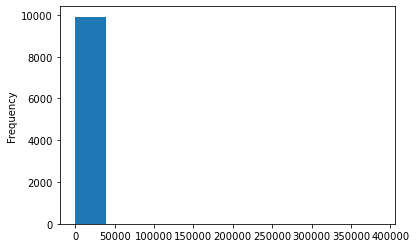

In [21]:
verbruikGas = df['VERBRUIKGAS']
verbruikGas.plot(kind='hist')

Well that did not help us at all. A histogram groups values into 'bins'. Almost all values are being pushed into 1 bin because of the outliers (=the extreme values).  
Let's first try to fix this by using more bins.

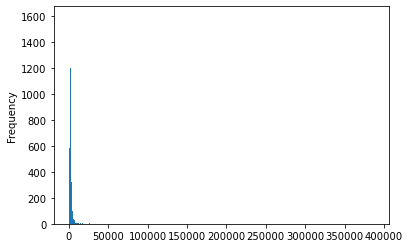

In [22]:
verbruikGas.plot(kind='hist', bins = 1000)

We are starting to see a distribution. We will have to leave out the extreme values to be able to zoom in on the left part of the plot.

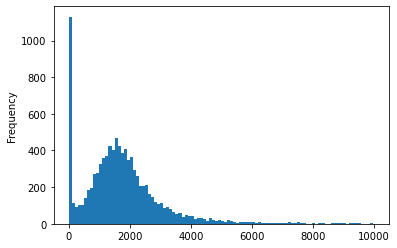

In [23]:
verbruikGas[verbruikGas < 10000].plot(kind='hist', bins = 100)

Now we see the distribution more clearly. What are some interesting insights that we can extract from this?
- We see a decent amount of customers actually don't have any gas consumption at all. This makes sense because some customers only use electricity.
- We see another peak at roughly 1800. Most of the customers seem to have a value around this peak. This part looks similar to a normal distribution. That makes sense. 
- We see a very long tail behind the normal distribution. It would be interesting to understand why such a tail exists. = What causes some customers to consume so much more gas than 'normal'?

We did leave out some customers (=rows) in the previous plot. It's best to check how many we left out. 

In [24]:
(verbruikGas < 10000).value_counts() / verbruikGas.count()

True     0.988228
False    0.011772
Name: VERBRUIKGAS, dtype: float64

We only left out ~1.2% of the customers. That means the above plot is a useful representation. We just sliced off the tail on the right that represented 1.2% of the remaining customers.

Another popular plot for showing the distribution of a numerical variable is a **box plot**
A box shows the min. lower quartile, median, upper quartile, max value and outliers.

![](https://naysan.ca/wp-content/uploads/2020/06/box_plot_ref_needed.png)

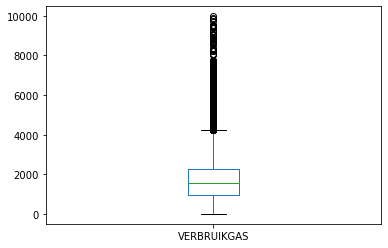

In [25]:
verbruikGas[verbruikGas < 10000].plot(kind='box')

If we did not filter out a large part of the outliers, this particular box plot would only show that we have a lot of high outliers.

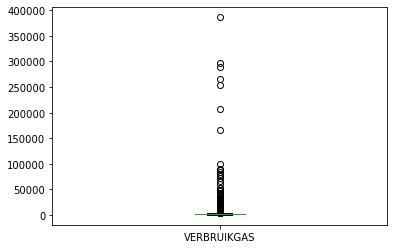

In [26]:
verbruikGas.plot(kind='box')

This should help you get started with doing a univariate analysis for numerical and categorical data in any dataset. 

There's one last univariate question that we should address. In the beginning we assumed that each row represents 1 customer.
It's best to validate this immediately. If each row represents a customer then each row should have a unique customer id. Let's check if that's true.

In [27]:
print( len(df) ) # Number of rows
print( len(df['klantnr'].unique()) ) #Number of unique customer ids

9939
9939


Perfect. Let's move on to bivariate analysis.

## Bivariate analysis

In Bivariate analysis we look at the relation between two columns. The way we can look at this relation depends on the type of data of the two columns.

Numerical vs numerical.
- Scatterplot
- Pearson correlation

Nummerical vs categorical
- Confidence intervals

Categorical vs categorical
- Contingency table
- Chi-squared test

Let's start with a **numerical vs numerical** bivariate analysis: VERBRUIKHOOG and VERBRUIKLAAG.  
First let's do a short univate analysis of each of these columns. 

In [28]:
columns = ['VERBRUIKHOOG', 'VERBRUIKLAAG']
verbruik = df[columns]
verbruik.describe()

,VERBRUIKHOOG,VERBRUIKLAAG
count,9939.000000,9939.000000
mean,2054.228594,1472.965993
std,6954.839109,3798.071775
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1237.000000,0.000000
75%,2547.000000,2148.000000
max,320543.000000,124267.000000


We see that these two columns are very large outliers, just like VERBRUIKGAS. 

A popular way to visualize the relation between two numerical variables is with a **scatter plot**

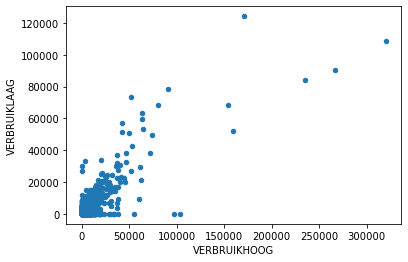

In [29]:
verbruik.plot(kind='scatter', x='VERBRUIKHOOG', y='VERBRUIKLAAG')

Most data points are smashed together in the bottom left corner because of the outliers. Let's try a scatter plot without the outliers.

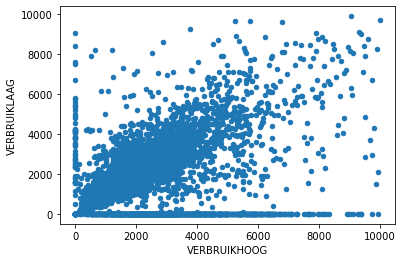

In [30]:
outlierFilter = (verbruik['VERBRUIKHOOG'] < 10000) & (verbruik['VERBRUIKLAAG'] < 10000)
verbruik[outlierFilter].plot(kind='scatter', x='VERBRUIKHOOG', y='VERBRUIKLAAG')

There are a couple of interesting observations here
- Many of the dots seem to be clustered around (2000,2000)
- There seems to be a linear relation between the two variables.
- There are also customers that only have a value for one of the two columns. 

A popular statistics for calculating the bivariate relation between two variable is the **Pearson correlation**.  
The Pearson correlation measures the lineair relation between two numerical variables. The result is a number between -1 and 1 where
- -1 indicates a perfect negative linear relation
- 0 indicates that there is no linear relation
- 1 indicates a perfect positive linear relation

![](https://cdn1.byjus.com/wp-content/uploads/2019/06/word-image28.png "Pearson correlation formula")


![](https://www.spss-tutorials.com/img/correlation-coefficient-multiple-scatterplots.png "Pearson correlation examples")

Let's calculate the pearson correlation for our two columns.

In [31]:
verbruik.corr()

,VERBRUIKHOOG,VERBRUIKLAAG
VERBRUIKHOOG,1.000000,0.807309
VERBRUIKLAAG,0.807309,1.000000


We see that each column has a perfect postive linear retationship with itself, which is always the case.  
We also see a high (>0.80) linear relation between our two columns. This makes sense. Is a customer has a high consumption during hours with a high price, then it's likely that they also have a high consumption during hours with a lower price.  

Why is this useful?  
A high correlation between column A and column B means that column A contains information about column B and vice versa. This information can be used to guess missing information. If we don't know VERBRUIKLAAG about a customer, we can make an informed guess based on the information we have about the customer's VERBUIKHOOG. 

This means we can already build a predictive model based on one bivariate analysis.

Now let's look at bivariate analysis for **categorical vs numerical** variables.  
We will use the columns VERBRUIKGAS & wervingskanaal. 

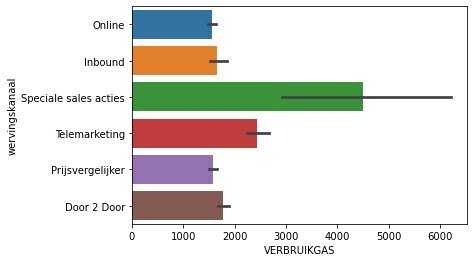

In [32]:
import seaborn as sns
sns.barplot(y="wervingskanaal", x="VERBRUIKGAS", data=df);

Seaborn made a special barplot for us. It's also showing confidence intervals for each category, respresented by the black lines. These are very important. Although the colors bars might indicate that the average VERBRUIKGAS is different for certain categories of wervingskanaal, we can not be sure unless we have enough data. The color bar shows us the mean value of VERBRUIKGAS for each category based on the dataset we received, but the black bar shows us the interval where we are confident that the real mean resides. 

It might be easiest to explain with the following scenario: You and I are are going to roll a 6-sided die. The numerical variable is the value we roll and the categorical variable is who rolled it. We know that in reality the average value of a 6-sided die is 3.5 (=(1+2+3+4+5+6)/6). We know that there is no skill involved, so who rolls the die has no impact on the result. We each roll the die 3 times. 

In [33]:
diceRolls = pd.DataFrame(data= {'Person': ['you', 'you', 'you', 'me','me','me'], 'Rolls': [6,3,6,2,4,2]})
diceRolls

,Person,Rolls
0,you,6
1,you,3
2,you,6
3,me,2
4,me,4
5,me,2


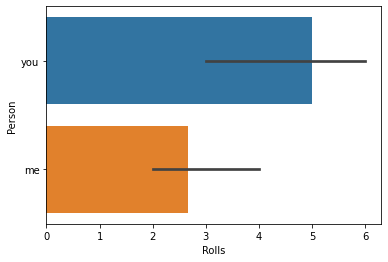

In [34]:
sns.barplot(y="Person", x="Rolls", data=diceRolls)

Although the colored bars indicate that your average value is currently higher than mine, the confidence intervals are still large. As long as they overlap, we can not be sure if there's truely a difference. 

The CI is calculated as follows:

![](https://getcalc.com/formula/statistics/mean-confidence-interval-infinite-population.png)

Now we'll look at bivariate analysis for **categorical vs categorical** variables. We'll look at the columns opleiding and inkomen.

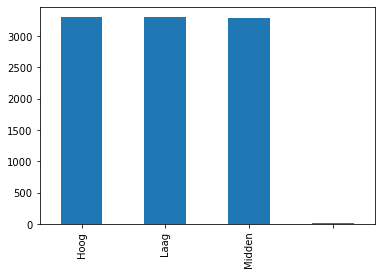

In [35]:
df['opleiding'].value_counts().plot(kind='bar')

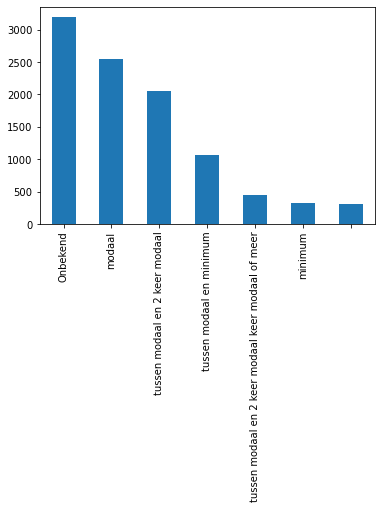

In [36]:
df['inkomen'].value_counts().plot(kind='bar')

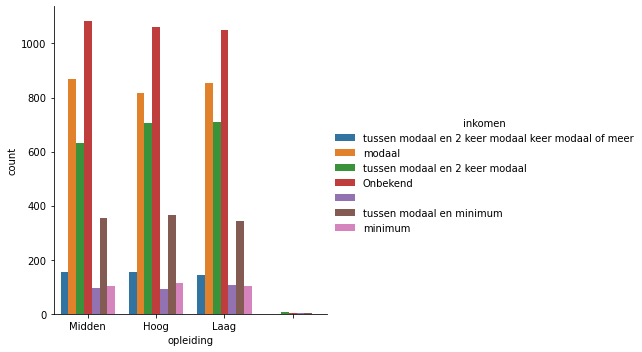

In [37]:
import seaborn as sns
sns.catplot( x='opleiding',hue='inkomen',  data=df, kind='count')

In [38]:
from scipy.stats import chi2_contingency
contingencyTable = df.groupby(['opleiding','inkomen']).size().unstack('opleiding')
contingencyTable

opleiding,,Hoog,Laag,Midden
inkomen,,,,
,2,92,106,97
Onbekend,3,1061,1048,1083
minimum,1,113,101,103
modaal,1,817,852,868
tussen modaal en 2 keer modaal,5,704,709,630
tussen modaal en 2 keer modaal keer modaal of meer,1,154,143,155
tussen modaal en minimum,2,364,345,355


In [39]:
chi2_contingency(contingencyTable)

(20.934560883795083,
 0.282727382472035,
 18,
 array([[4.49319213e-01, 9.90000000e+01, 9.89700454e+01, 9.85806354e+01],
        [4.83358548e+00, 1.06500000e+03, 1.06467776e+03, 1.06048865e+03],
        [4.81089259e-01, 1.06000000e+02, 1.05967927e+02, 1.05550983e+02],
        [3.83963691e+00, 8.46000000e+02, 8.45744024e+02, 8.42416339e+02],
        [3.09833585e+00, 6.82666667e+02, 6.82460111e+02, 6.79774887e+02],
        [6.85325265e-01, 1.51000000e+02, 1.50954312e+02, 1.50360363e+02],
        [1.61270802e+00, 3.55333333e+02, 3.55225819e+02, 3.53828139e+02]]))

The results indicate that there's a 28% chance of there being no relationship between the two categorical variables. In statistics this value has to be lower than 5% in order to assume that there's actually a relationelship between the two categorical variables. 

![](https://miro.medium.com/max/532/1*S8rfFkmLhDbOz4RGNwuz6g.png)

In [40]:
catData = pd.DataFrame(data= {'Category1': ['a','a','a','b','b','b','c','c','c'], 'Category2': ['x','x','x','y','y','y','z','z','z']})
catData

,Category1,Category2
0,a,x
1,a,x
2,a,x
3,b,y
4,b,y
5,b,y
6,c,z
7,c,z
8,c,z


In [41]:
contigencyTable2 = catData.groupby(['Category1','Category2']).size().unstack('Category1').fillna(0)
contigencyTable2

Category1,a,b,c
Category2,,,
x,3.0,0.0,0.0
y,0.0,3.0,0.0
z,0.0,0.0,3.0


In [42]:
chi2_contingency(contigencyTable2)

(18.0,
 0.0012340980408667957,
 4,
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]))

## Multivariate analysis

In multivariate analysis we look at the relation between more than two columns. There are many multivariate techniques. Many Machine Learning models are actually multivariate techniques. This topic is out of scope for this workshop.

# Task
Do the following for your group project and/or the Titanic case:
- Create a list of important questions
- Answer these questions by exploring the data with Pandas, Seaborn, etc.
- Present (a summary of) your results at the end of the day